In [75]:
import numpy as np
import pandas as pd

In [76]:
covid_data = pd.read_csv('../data/Covid19Data/covid19_0706.csv',encoding='euc-kr')
covid_data

,date,region,confirmed,death,released
0,20200217,서울,14,0,3
1,20200217,부산,0,0,0
2,20200217,대구,0,0,0
3,20200217,인천,1,0,1
4,20200217,광주,2,0,0
...,...,...,...,...,...
2515,20200705,전남,25,0,19
2516,20200705,경북,1392,54,1330
2517,20200705,경남,137,0,129
2518,20200705,제주,20,0,18


## 시도별로 모으기

In [77]:
covid_region = covid_data.sort_values(by=['region','date'], ascending=True)
covid_region.head()

,date,region,confirmed,death,released
9,20200217,강원,0,0,0
27,20200218,강원,0,0,0
45,20200219,강원,0,0,0
63,20200220,강원,1,0,0
81,20200221,강원,1,0,0


## 다시 인덱스 부여

In [78]:
covid_region = covid_region.reset_index(drop=True)
covid_region

,date,region,confirmed,death,released
0,20200217,강원,0,0,0
1,20200218,강원,0,0,0
2,20200219,강원,0,0,0
3,20200220,강원,1,0,0
4,20200221,강원,1,0,0
...,...,...,...,...,...
2515,20200701,충북,64,0,60
2516,20200702,충북,64,0,61
2517,20200703,충북,64,0,61
2518,20200704,충북,66,0,61


## 각 지역명을 지도에 사용할 이름과 동일하게 변경

In [79]:
covid_data['region'].drop_duplicates()

0     서울
1     부산
2     대구
3     인천
4     광주
5     대전
6     울산
7     세종
8     경기
9     강원
10    충북
11    충남
12    전북
13    전남
14    경북
15    경남
16    제주
17    검역
Name: region, dtype: object

In [80]:
covid_region["region"] = np.where(covid_region["region"] == "서울", "서울특별시", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "부산", "부산광역시", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "대구", "대구광역시", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "인천", "인천광역시", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "광주", "광주광역시", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "대전", "대전광역시", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "울산", "울산광역시", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "세종", "세종특별자치시", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "경기", "경기도", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "강원", "강원도", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "충북", "충청북도", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "충남", "충청남도", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "전북", "전라북도", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "전남", "전라남도", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "경북", "경상북도", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "경남", "경상남도", covid_region['region'])
covid_region["region"] = np.where(covid_region["region"] == "제주", "제주특별자치도", covid_region['region'])

covid_region

,date,region,confirmed,death,released
0,20200217,강원도,0,0,0
1,20200218,강원도,0,0,0
2,20200219,강원도,0,0,0
3,20200220,강원도,1,0,0
4,20200221,강원도,1,0,0
...,...,...,...,...,...
2515,20200701,충청북도,64,0,60
2516,20200702,충청북도,64,0,61
2517,20200703,충청북도,64,0,61
2518,20200704,충청북도,66,0,61


In [81]:
covid_region = covid_region.set_index("date", drop=True)

In [82]:
covid_region.dtypes
covid_region

,region,confirmed,death,released
date,,,,
20200217,강원도,0,0,0
20200218,강원도,0,0,0
20200219,강원도,0,0,0
20200220,강원도,1,0,0
20200221,강원도,1,0,0
...,...,...,...,...
20200701,충청북도,64,0,60
20200702,충청북도,64,0,61
20200703,충청북도,64,0,61


In [83]:
co02 = covid_region.loc[20200229]
co03 = covid_region.loc[20200331]
co04 = covid_region.loc[20200430]
co05 = covid_region.loc[20200531]
co06 = covid_region.loc[20200630]
co07 = covid_region.loc[20200705]

In [84]:
covid_increse = pd.concat([co02,co03,co04,co05,co06,co07], sort=False)

In [85]:
covid_increse

,region,confirmed,death,released
date,,,,
20200229,강원도,7,0,0
20200229,검역,0,0,0
20200229,경기도,82,1,9
20200229,경상남도,59,0,0
20200229,경상북도,488,6,2
...,...,...,...,...
20200705,전라남도,25,0,19
20200705,전라북도,29,0,22
20200705,제주특별자치도,20,0,18


In [86]:
covid_increse = covid_increse.sort_values(by=['region','date'], ascending=True)
covid_increse

,region,confirmed,death,released
date,,,,
20200229,강원도,7,0,0
20200331,강원도,36,1,23
20200430,강원도,53,2,40
20200531,강원도,57,3,50
20200630,강원도,65,3,54
...,...,...,...,...
20200331,충청북도,44,0,22
20200430,충청북도,45,0,41
20200531,충청북도,60,0,49


In [87]:
covid_서울 = covid_increse[covid_increse["region"] == "서울특별시"]
covid_서울["increase"] = 0
covid_서울 = covid_서울.reset_index(drop=False)
covid_서울.iloc[0,5] = covid_서울.iloc[0,2]
for i in range(0,5):
    covid_서울.iloc[i+1,5] = covid_서울.iloc[i+1,2] - covid_서울.iloc[i,2]
for i in range(0,5):
    covid_서울["rate_incr"] = (covid_서울["increase"]/np.sum(covid_서울["increase"]))*100
covid_서울

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,서울특별시,77,0,11,77,5.624543
1,20200331,서울특별시,450,0,107,373,27.246165
2,20200430,서울특별시,633,2,453,183,13.367421
3,20200531,서울특별시,861,4,627,228,16.654492
4,20200630,서울특별시,1312,7,985,451,32.943755
5,20200705,서울특별시,1369,8,1105,57,4.163623


In [88]:
covid_부산 = covid_increse[covid_increse["region"] == "부산광역시"]
covid_부산["increase"] = 0
covid_부산 = covid_부산.reset_index(drop=False)
covid_부산.iloc[0,5] = covid_부산.iloc[0,2]
for i in range(0,5):
    covid_부산.iloc[i+1,5] = covid_부산.iloc[i+1,2] - covid_부산.iloc[i,2]
for i in range(0,5):
    covid_부산["rate_incr"] = (covid_부산["increase"]/np.sum(covid_부산["increase"]))*100
covid_부산

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,부산광역시,80,0,0,80,51.612903
1,20200331,부산광역시,119,3,87,39,25.161290
2,20200430,부산광역시,137,3,116,18,11.612903
3,20200531,부산광역시,147,3,138,10,6.451613
4,20200630,부산광역시,154,3,142,7,4.516129
5,20200705,부산광역시,155,3,146,1,0.645161


In [89]:
covid_대구 = covid_increse[covid_increse["region"] == "대구광역시"]
covid_대구["increase"] = 0
covid_대구 = covid_대구.reset_index(drop=False)
covid_대구.iloc[0,5] = covid_대구.iloc[0,2]
for i in range(0,5):
    covid_대구.iloc[i+1,5] = covid_대구.iloc[i+1,2] - covid_대구.iloc[i,2]
for i in range(0,5):
    covid_대구["rate_incr"] = (covid_대구["increase"]/np.sum(covid_대구["increase"]))*100
covid_대구

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,대구광역시,2236,10,2,2236,32.293472
1,20200331,대구광역시,6684,114,3946,4448,64.240324
2,20200430,대구광역시,6852,172,6144,168,2.426343
3,20200531,대구광역시,6883,185,6607,31,0.447718
4,20200630,대구광역시,6906,189,6700,23,0.332178
5,20200705,대구광역시,6924,189,6707,18,0.259965


In [90]:
covid_인천 = covid_increse[covid_increse["region"] == "인천광역시"]
covid_인천["increase"] = 0
covid_인천 = covid_인천.reset_index(drop=False)
covid_인천.iloc[0,5] = covid_인천.iloc[0,2]
for i in range(0,5):
    covid_인천.iloc[i+1,5] = covid_인천.iloc[i+1,2] - covid_인천.iloc[i,2]
for i in range(0,5):
    covid_인천["rate_incr"] = (covid_인천["increase"]/np.sum(covid_인천["increase"]))*100
covid_인천

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,인천광역시,6,0,1,6,1.734104
1,20200331,인천광역시,64,0,16,58,16.763006
2,20200430,인천광역시,93,0,68,29,8.381503
3,20200531,인천광역시,206,0,94,113,32.658960
4,20200630,인천광역시,341,1,290,135,39.017341
5,20200705,인천광역시,346,1,319,5,1.445087


In [91]:
covid_광주 = covid_increse[covid_increse["region"] == "광주광역시"]
covid_광주["increase"] = 0
covid_광주 = covid_광주.reset_index(drop=False)
covid_광주.iloc[0,5] = covid_광주.iloc[0,2]
for i in range(0,5):
    covid_광주.iloc[i+1,5] = covid_광주.iloc[i+1,2] - covid_광주.iloc[i,2]
for i in range(0,5):
    covid_광주["rate_incr"] = (covid_광주["increase"]/np.sum(covid_광주["increase"]))*100
covid_광주

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,광주광역시,9,0,2,9,8.333333
1,20200331,광주광역시,20,0,14,11,10.185185
2,20200430,광주광역시,30,0,27,10,9.259259
3,20200531,광주광역시,32,0,30,2,1.851852
4,20200630,광주광역시,44,0,32,12,11.111111
5,20200705,광주광역시,108,0,33,64,59.259259


In [92]:
covid_대전 = covid_increse[covid_increse["region"] == "대전광역시"]
covid_대전["increase"] = 0
covid_대전 = covid_대전.reset_index(drop=False)
covid_대전.iloc[0,5] = covid_대전.iloc[0,2]
for i in range(0,5):
    covid_대전.iloc[i+1,5] = covid_대전.iloc[i+1,2] - covid_대전.iloc[i,2]
for i in range(0,5):
    covid_대전["rate_incr"] = (covid_대전["increase"]/np.sum(covid_대전["increase"]))*100
covid_대전

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,대전광역시,13,0,0,13,9.489051
1,20200331,대전광역시,36,0,18,23,16.788321
2,20200430,대전광역시,40,0,35,4,2.919708
3,20200531,대전광역시,46,1,42,6,4.379562
4,20200630,대전광역시,117,1,44,71,51.824818
5,20200705,대전광역시,137,1,48,20,14.598540


In [93]:
covid_울산 = covid_increse[covid_increse["region"] == "울산광역시"]
covid_울산["increase"] = 0
covid_울산 = covid_울산.reset_index(drop=False)
covid_울산.iloc[0,5] = covid_울산.iloc[0,2]
for i in range(0,5):
    covid_울산.iloc[i+1,5] = covid_울산.iloc[i+1,2] - covid_울산.iloc[i,2]
for i in range(0,5):
    covid_울산["rate_incr"] = (covid_울산["increase"]/np.sum(covid_울산["increase"]))*100
covid_울산

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,울산광역시,17,0,0,17,30.909091
1,20200331,울산광역시,39,0,19,22,40.000000
2,20200430,울산광역시,43,1,37,4,7.272727
3,20200531,울산광역시,52,1,45,9,16.363636
4,20200630,울산광역시,55,1,50,3,5.454545
5,20200705,울산광역시,55,1,52,0,0.000000


In [94]:
covid_세종 = covid_increse[covid_increse["region"] == "세종특별자치시"]
covid_세종["increase"] = 0
covid_세종 = covid_세종.reset_index(drop=False)
covid_세종.iloc[0,5] = covid_세종.iloc[0,2]
for i in range(0,5):
    covid_세종.iloc[i+1,5] = covid_세종.iloc[i+1,2] - covid_세종.iloc[i,2]
for i in range(0,5):
    covid_세종["rate_incr"] = (covid_세종["increase"]/np.sum(covid_세종["increase"]))*100
covid_세종

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,세종특별자치시,1,0,0,1,2.0
1,20200331,세종특별자치시,46,0,12,45,90.0
2,20200430,세종특별자치시,46,0,38,0,0.0
3,20200531,세종특별자치시,47,0,47,1,2.0
4,20200630,세종특별자치시,50,0,47,3,6.0
5,20200705,세종특별자치시,50,0,47,0,0.0


In [95]:
covid_경기 = covid_increse[covid_increse["region"] == "경기도"]
covid_경기["increase"] = 0
covid_경기 = covid_경기.reset_index(drop=False)
covid_경기.iloc[0,5] = covid_경기.iloc[0,2]
for i in range(0,5):
    covid_경기.iloc[i+1,5] = covid_경기.iloc[i+1,2] - covid_경기.iloc[i,2]
for i in range(0,5):
    covid_경기["rate_incr"] = (covid_경기["increase"]/np.sum(covid_경기["increase"]))*100
covid_경기

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,경기도,82,1,9,82,6.416275
1,20200331,경기도,476,6,166,394,30.829421
2,20200430,경기도,676,15,486,200,15.649452
3,20200531,경기도,840,19,650,164,12.832551
4,20200630,경기도,1207,23,931,367,28.716745
5,20200705,경기도,1278,23,1013,71,5.555556


In [96]:
covid_강원도 = covid_increse[covid_increse["region"] == "강원도"]
covid_강원도["increase"] = 0
covid_강원도 = covid_강원도.reset_index(drop=False)
covid_강원도.iloc[0,5] = covid_강원도.iloc[0,2]
for i in range(0,5):
    covid_강원도.iloc[i+1,5] = covid_강원도.iloc[i+1,2] - covid_강원도.iloc[i,2]
for i in range(0,5):
    covid_강원도["rate_incr"] = (covid_강원도["increase"]/np.sum(covid_강원도["increase"]))*100
covid_강원도

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,강원도,7,0,0,7,10.606061
1,20200331,강원도,36,1,23,29,43.939394
2,20200430,강원도,53,2,40,17,25.757576
3,20200531,강원도,57,3,50,4,6.060606
4,20200630,강원도,65,3,54,8,12.121212
5,20200705,강원도,66,3,55,1,1.515152


In [97]:
covid_충북 = covid_increse[covid_increse["region"] == "충청북도"]
covid_충북["increase"] = 0
covid_충북 = covid_충북.reset_index(drop=False)
covid_충북.iloc[0,5] = covid_충북.iloc[0,2]
for i in range(0,5):
    covid_충북.iloc[i+1,5] = covid_충북.iloc[i+1,2] - covid_충북.iloc[i,2]
for i in range(0,5):
    covid_충북["rate_incr"] = (covid_충북["increase"]/np.sum(covid_충북["increase"]))*100
covid_충북

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,충청북도,10,0,0,10,15.151515
1,20200331,충청북도,44,0,22,34,51.515152
2,20200430,충청북도,45,0,41,1,1.515152
3,20200531,충청북도,60,0,49,15,22.727273
4,20200630,충청북도,65,0,60,5,7.575758
5,20200705,충청북도,66,0,61,1,1.515152


In [98]:
covid_충남 = covid_increse[covid_increse["region"] == "충청남도"]
covid_충남["increase"] = 0
covid_충남 = covid_충남.reset_index(drop=False)
covid_충남.iloc[0,5] = covid_충남.iloc[0,2]
for i in range(0,5):
    covid_충남.iloc[i+1,5] = covid_충남.iloc[i+1,2] - covid_충남.iloc[i,2]
for i in range(0,5):
    covid_충남["rate_incr"] = (covid_충남["increase"]/np.sum(covid_충남["increase"]))*100
covid_충남

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,충청남도,55,0,0,55,31.976744
1,20200331,충청남도,128,0,90,73,42.441860
2,20200430,충청남도,143,0,127,15,8.720930
3,20200531,충청남도,146,0,142,3,1.744186
4,20200630,충청남도,167,0,150,21,12.209302
5,20200705,충청남도,172,0,151,5,2.906977


In [99]:
covid_전북 = covid_increse[covid_increse["region"] == "전라북도"]
covid_전북["increase"] = 0
covid_전북 = covid_전북.reset_index(drop=False)
covid_전북.iloc[0,5] = covid_전북.iloc[0,2]
for i in range(0,5):
    covid_전북.iloc[i+1,5] = covid_전북.iloc[i+1,2] - covid_전북.iloc[i,2]
for i in range(0,5):
    covid_전북["rate_incr"] = (covid_전북["increase"]/np.sum(covid_전북["increase"]))*100
covid_전북

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,전라북도,5,0,1,5,17.241379
1,20200331,전라북도,13,0,7,8,27.586207
2,20200430,전라북도,18,0,11,5,17.241379
3,20200531,전라북도,21,0,19,3,10.344828
4,20200630,전라북도,27,0,21,6,20.689655
5,20200705,전라북도,29,0,22,2,6.896552


In [100]:
covid_전남 = covid_increse[covid_increse["region"] == "전라남도"]
covid_전남["increase"] = 0
covid_전남 = covid_전남.reset_index(drop=False)
covid_전남.iloc[0,5] = covid_전남.iloc[0,2]
for i in range(0,5):
    covid_전남.iloc[i+1,5] = covid_전남.iloc[i+1,2] - covid_전남.iloc[i,2]
for i in range(0,5):
    covid_전남["rate_incr"] = (covid_전남["increase"]/np.sum(covid_전남["increase"]))*100
covid_전남

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,전라남도,3,0,1,3,12.0
1,20200331,전라남도,9,0,3,6,24.0
2,20200430,전라남도,15,0,11,6,24.0
3,20200531,전라남도,19,0,17,4,16.0
4,20200630,전라남도,24,0,19,5,20.0
5,20200705,전라남도,25,0,19,1,4.0


In [101]:
covid_경북 = covid_increse[covid_increse["region"] == "경상북도"]
covid_경북["increase"] = 0
covid_경북 = covid_경북.reset_index(drop=False)
covid_경북.iloc[0,5] = covid_경북.iloc[0,2]
for i in range(0,5):
    covid_경북.iloc[i+1,5] = covid_경북.iloc[i+1,2] - covid_경북.iloc[i,2]
for i in range(0,5):
    covid_경북["rate_incr"] = (covid_경북["increase"]/np.sum(covid_경북["increase"]))*100
covid_경북

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,경상북도,488,6,2,488,35.057471
1,20200331,경상북도,1300,38,808,812,58.333333
2,20200430,경상북도,1365,52,1147,65,4.669540
3,20200531,경상북도,1379,54,1295,14,1.005747
4,20200630,경상북도,1389,54,1328,10,0.718391
5,20200705,경상북도,1392,54,1330,3,0.215517


In [102]:
covid_경남 = covid_increse[covid_increse["region"] == "경상남도"]
covid_경남["increase"] = 0
covid_경남 = covid_경남.reset_index(drop=False)
covid_경남.iloc[0,5] = covid_경남.iloc[0,2]
for i in range(0,5):
    covid_경남.iloc[i+1,5] = covid_경남.iloc[i+1,2] - covid_경남.iloc[i,2]
for i in range(0,5):
    covid_경남["rate_incr"] = (covid_경남["increase"]/np.sum(covid_경남["increase"]))*100
covid_경남

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,경상남도,59,0,0,59,43.065693
1,20200331,경상남도,96,0,67,37,27.007299
2,20200430,경상남도,117,0,97,21,15.328467
3,20200531,경상남도,123,0,121,6,4.379562
4,20200630,경상남도,134,0,128,11,8.029197
5,20200705,경상남도,137,0,129,3,2.189781


In [103]:
covid_제주 = covid_increse[covid_increse["region"] == "제주특별자치도"]
covid_제주["increase"] = 0
covid_제주 = covid_제주.reset_index(drop=False)
covid_제주.iloc[0,5] = covid_제주.iloc[0,2]
for i in range(0,5):
    covid_제주.iloc[i+1,5] = covid_제주.iloc[i+1,2] - covid_제주.iloc[i,2]
for i in range(0,5):
    covid_제주["rate_incr"] = (covid_제주["increase"]/np.sum(covid_제주["increase"]))*100
covid_제주

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,제주특별자치도,2,0,0,2,10.0
1,20200331,제주특별자치도,9,0,3,7,35.0
2,20200430,제주특별자치도,13,0,8,4,20.0
3,20200531,제주특별자치도,15,0,13,2,10.0
4,20200630,제주특별자치도,19,0,16,4,20.0
5,20200705,제주특별자치도,20,0,18,1,5.0


In [104]:
covid_검역 = covid_increse[covid_increse["region"] == "검역"]
covid_검역["increase"] = 0
covid_검역 = covid_검역.reset_index(drop=False)
covid_검역.iloc[0,5] = covid_검역.iloc[0,2]
for i in range(0,5):
    covid_검역.iloc[i+1,5] = covid_검역.iloc[i+1,2] - covid_검역.iloc[i,2]
for i in range(0,5):
    covid_검역["rate_incr"] = (covid_검역["increase"]/np.sum(covid_검역["increase"]))*100
covid_검역

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,region,confirmed,death,released,increase,rate_incr
0,20200229,검역,0,0,0,0,0.000000
1,20200331,검역,217,0,0,217,28.477690
2,20200430,검역,446,0,173,229,30.052493
3,20200531,검역,534,0,419,88,11.548556
4,20200630,검역,724,0,540,190,24.934383
5,20200705,검역,762,0,577,38,4.986877


In [105]:
covid_total_incre = pd.concat([covid_서울,covid_부산,covid_대구,covid_인천,covid_광주,covid_대전,covid_울산,
                               covid_세종,covid_경기,covid_강원도,covid_충북,covid_충남,covid_전북,covid_전남,
                               covid_경북,covid_경남,covid_제주,covid_검역], sort=False)
covid_total_incre

,date,region,confirmed,death,released,increase,rate_incr
0,20200229,서울특별시,77,0,11,77,5.624543
1,20200331,서울특별시,450,0,107,373,27.246165
2,20200430,서울특별시,633,2,453,183,13.367421
3,20200531,서울특별시,861,4,627,228,16.654492
4,20200630,서울특별시,1312,7,985,451,32.943755
...,...,...,...,...,...,...,...
1,20200331,검역,217,0,0,217,28.477690
2,20200430,검역,446,0,173,229,30.052493
3,20200531,검역,534,0,419,88,11.548556
4,20200630,검역,724,0,540,190,24.934383


In [106]:
pv_increase = pd.pivot_table(covid_total_incre,index=["region"],values=["increase"],aggfunc=[np.mean,np.sum])
df_pv_increase = pd.DataFrame(pv_increase)

In [107]:
df_pv_increase.drop("검역", inplace=True)

In [108]:
df_pv_increase

,mean,sum
,increase,increase
region,,
강원도,11.000000,66
경기도,213.000000,1278
경상남도,22.833333,137
경상북도,232.000000,1392
광주광역시,18.000000,108
대구광역시,1154.000000,6924
대전광역시,22.833333,137
부산광역시,25.833333,155


In [109]:
import json
import folium
geo_path = '../data/Covid19Data/TL_SCCO_CTPRVN.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [110]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=7, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = df_pv_increase['mean']['increase'],
               columns = [df_pv_increase.index, df_pv_increase['mean']['increase']],
               fill_color = 'PuRd',
               key_on = 'properties.CTP_KOR_NM')

map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [111]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=7, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = df_pv_increase['sum']['increase'],
               columns = [df_pv_increase.index, df_pv_increase['sum']['increase']],
               fill_color = 'PuRd',
               key_on = 'properties.CTP_KOR_NM')

map

In [112]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style

In [113]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

<Figure size 432x288 with 0 Axes>

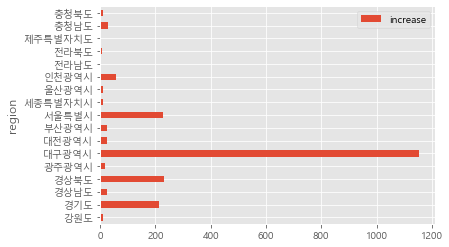

In [114]:
plt.figure();

df_pv_increase["mean"].plot(kind='barh');

In [115]:
covid_서울특별시2 = covid_서울.drop(['confirmed','death','released','increase','region'], axis=1)
covid_서울특별시2.columns = ['date', '서울특별시']

In [116]:
covid_부산광역시2 = covid_부산.drop(['confirmed','death','released','increase','region'], axis=1)
covid_부산광역시2.columns = ['date', '부산광역시']

In [117]:
covid_대구광역시2 = covid_대구.drop(['confirmed','death','released','increase','region'], axis=1)
covid_대구광역시2.columns = ['date', '대구광역시']

In [118]:
covid_인천광역시2 = covid_인천.drop(['confirmed','death','released','increase','region'], axis=1)
covid_인천광역시2.columns = ['date', '인천광역시']

In [119]:
covid_광주광역시2 = covid_광주.drop(['confirmed','death','released','increase','region'], axis=1)
covid_광주광역시2.columns = ['date', '광주광역시']

In [120]:
covid_대전광역시2 = covid_대전.drop(['confirmed','death','released','increase','region'], axis=1)
covid_대전광역시2.columns = ['date', '대전광역시']

In [121]:
covid_울산광역시2 = covid_울산.drop(['confirmed','death','released','increase','region'], axis=1)
covid_울산광역시2.columns = ['date', '울산광역시']

In [122]:
covid_세종특별자치시2 = covid_세종.drop(['confirmed','death','released','increase','region'], axis=1)
covid_세종특별자치시2.columns = ['date', '세종특별자치시']

In [123]:
covid_강원도2 = covid_강원도.drop(['confirmed','death','released','increase','region'], axis=1)
covid_강원도2.columns = ['date', '강원도']

In [124]:
covid_경기도2 = covid_경기.drop(['confirmed','death','released','increase','region'], axis=1)
covid_경기도2.columns = ['date', '경기도']

In [125]:
covid_충청북도2 = covid_충북.drop(['confirmed','death','released','increase','region'], axis=1)
covid_충청북도2.columns = ['date', '충청북도']

In [126]:
covid_충청남도2 = covid_충남.drop(['confirmed','death','released','increase','region'], axis=1)
covid_충청남도2.columns = ['date', '충청남도']

In [127]:
covid_전라북도2 = covid_전북.drop(['confirmed','death','released','increase','region'], axis=1)
covid_전라북도2.columns = ['date', '전라북도']

In [128]:
covid_전라남도2 = covid_전남.drop(['confirmed','death','released','increase','region'], axis=1)
covid_전라남도2.columns = ['date', '전라남도']

In [129]:
covid_경상북도2 = covid_경북.drop(['confirmed','death','released','increase','region'], axis=1)
covid_경상북도2.columns = ['date', '경상북도']

In [130]:
covid_경상남도2 = covid_경남.drop(['confirmed','death','released','increase','region'], axis=1)
covid_경상남도2.columns = ['date', '경상남도']

In [131]:
covid_제주특별자치도2 = covid_제주.drop(['confirmed','death','released','increase','region'], axis=1)
covid_제주특별자치도2.columns = ['date', '제주특별자치도']

In [132]:
covid_검역 = covid_검역.drop(['confirmed','death','released','increase','region'], axis=1)
covid_검역.columns = ['date', '검역']

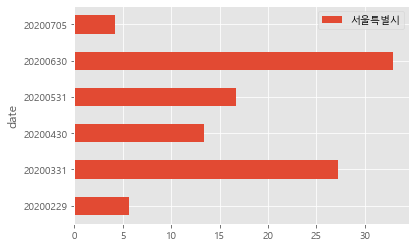

In [133]:
covid_서울특별시2.plot(kind='barh', x='date', y='서울특별시')

In [134]:
covid_서울특별시2

,date,서울특별시
0,20200229,5.624543
1,20200331,27.246165
2,20200430,13.367421
3,20200531,16.654492
4,20200630,32.943755
5,20200705,4.163623


In [135]:
covid_increse_rate = pd.merge(covid_서울특별시2, covid_부산광역시2, on='date')

In [136]:
covid_increse_rate = pd.merge(covid_increse_rate, covid_대구광역시2, on='date')

In [137]:
covid_increse_rate = pd.merge(covid_increse_rate, covid_인천광역시2, on='date')

In [138]:
covid_increse_rate = pd.merge(covid_increse_rate, covid_광주광역시2, on='date')

In [139]:
covid_increse_rate = pd.merge(covid_increse_rate, covid_대전광역시2, on='date')

In [140]:
covid_increse_rate = pd.merge(covid_increse_rate, covid_울산광역시2, on='date')

In [141]:
covid_increse_rate = pd.merge(covid_increse_rate, covid_세종특별자치시2, on='date')

In [142]:
covid_increse_rate = pd.merge(covid_increse_rate, covid_경기도2, on='date')
covid_increse_rate = pd.merge(covid_increse_rate, covid_강원도2, on='date')
covid_increse_rate = pd.merge(covid_increse_rate, covid_충청북도2, on='date')
covid_increse_rate = pd.merge(covid_increse_rate, covid_충청남도2, on='date')
covid_increse_rate = pd.merge(covid_increse_rate, covid_전라북도2, on='date')
covid_increse_rate = pd.merge(covid_increse_rate, covid_전라남도2, on='date')
covid_increse_rate = pd.merge(covid_increse_rate, covid_경상북도2, on='date')
covid_increse_rate = pd.merge(covid_increse_rate, covid_경상남도2, on='date')
covid_increse_rate = pd.merge(covid_increse_rate, covid_제주특별자치도2, on='date')
covid_increse_rate = pd.merge(covid_increse_rate, covid_검역, on='date')

In [72]:
# covid_increse_rate = covid_increse_rate.reset_index()

In [143]:
covid_increse_rate

,date,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,검역
0,20200229,5.624543,51.612903,32.293472,1.734104,8.333333,9.489051,30.909091,2.0,6.416275,10.606061,15.151515,31.976744,17.241379,12.0,35.057471,43.065693,10.0,0.000000
1,20200331,27.246165,25.161290,64.240324,16.763006,10.185185,16.788321,40.000000,90.0,30.829421,43.939394,51.515152,42.441860,27.586207,24.0,58.333333,27.007299,35.0,28.477690
2,20200430,13.367421,11.612903,2.426343,8.381503,9.259259,2.919708,7.272727,0.0,15.649452,25.757576,1.515152,8.720930,17.241379,24.0,4.669540,15.328467,20.0,30.052493
3,20200531,16.654492,6.451613,0.447718,32.658960,1.851852,4.379562,16.363636,2.0,12.832551,6.060606,22.727273,1.744186,10.344828,16.0,1.005747,4.379562,10.0,11.548556
4,20200630,32.943755,4.516129,0.332178,39.017341,11.111111,51.824818,5.454545,6.0,28.716745,12.121212,7.575758,12.209302,20.689655,20.0,0.718391,8.029197,20.0,24.934383
5,20200705,4.163623,0.645161,0.259965,1.445087,59.259259,14.598540,0.000000,0.0,5.555556,1.515152,1.515152,2.906977,6.896552,4.0,0.215517,2.189781,5.0,4.986877


In [144]:
dates = [20.02,20.03,20.04,20.05,20.06,20.07]
covid_increse_rate['date'] = dates
covid_increse_rate

,date,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,검역
0,20.02,5.624543,51.612903,32.293472,1.734104,8.333333,9.489051,30.909091,2.0,6.416275,10.606061,15.151515,31.976744,17.241379,12.0,35.057471,43.065693,10.0,0.000000
1,20.03,27.246165,25.161290,64.240324,16.763006,10.185185,16.788321,40.000000,90.0,30.829421,43.939394,51.515152,42.441860,27.586207,24.0,58.333333,27.007299,35.0,28.477690
2,20.04,13.367421,11.612903,2.426343,8.381503,9.259259,2.919708,7.272727,0.0,15.649452,25.757576,1.515152,8.720930,17.241379,24.0,4.669540,15.328467,20.0,30.052493
3,20.05,16.654492,6.451613,0.447718,32.658960,1.851852,4.379562,16.363636,2.0,12.832551,6.060606,22.727273,1.744186,10.344828,16.0,1.005747,4.379562,10.0,11.548556
4,20.06,32.943755,4.516129,0.332178,39.017341,11.111111,51.824818,5.454545,6.0,28.716745,12.121212,7.575758,12.209302,20.689655,20.0,0.718391,8.029197,20.0,24.934383
5,20.07,4.163623,0.645161,0.259965,1.445087,59.259259,14.598540,0.000000,0.0,5.555556,1.515152,1.515152,2.906977,6.896552,4.0,0.215517,2.189781,5.0,4.986877


In [152]:
covid_increse_rate = covid_increse_rate.set_index('date', drop=True)

In [153]:
covid_increse_rate

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,검역
date,,,,,,,,,,,,,,,,,,
20.02,5.624543,51.612903,32.293472,1.734104,8.333333,9.489051,30.909091,2.0,6.416275,10.606061,15.151515,31.976744,17.241379,12.0,35.057471,43.065693,10.0,0.000000
20.03,27.246165,25.161290,64.240324,16.763006,10.185185,16.788321,40.000000,90.0,30.829421,43.939394,51.515152,42.441860,27.586207,24.0,58.333333,27.007299,35.0,28.477690
20.04,13.367421,11.612903,2.426343,8.381503,9.259259,2.919708,7.272727,0.0,15.649452,25.757576,1.515152,8.720930,17.241379,24.0,4.669540,15.328467,20.0,30.052493
20.05,16.654492,6.451613,0.447718,32.658960,1.851852,4.379562,16.363636,2.0,12.832551,6.060606,22.727273,1.744186,10.344828,16.0,1.005747,4.379562,10.0,11.548556
20.06,32.943755,4.516129,0.332178,39.017341,11.111111,51.824818,5.454545,6.0,28.716745,12.121212,7.575758,12.209302,20.689655,20.0,0.718391,8.029197,20.0,24.934383
20.07,4.163623,0.645161,0.259965,1.445087,59.259259,14.598540,0.000000,0.0,5.555556,1.515152,1.515152,2.906977,6.896552,4.0,0.215517,2.189781,5.0,4.986877


In [161]:
covid_increse_rate.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6 entries, 20.02 to 20.07
Data columns (total 18 columns):
서울특별시      6 non-null float64
부산광역시      6 non-null float64
대구광역시      6 non-null float64
인천광역시      6 non-null float64
광주광역시      6 non-null float64
대전광역시      6 non-null float64
울산광역시      6 non-null float64
세종특별자치시    6 non-null float64
경기도        6 non-null float64
강원도        6 non-null float64
충청북도       6 non-null float64
충청남도       6 non-null float64
전라북도       6 non-null float64
전라남도       6 non-null float64
경상북도       6 non-null float64
경상남도       6 non-null float64
제주특별자치도    6 non-null float64
검역         6 non-null float64
dtypes: float64(18)
memory usage: 1.0 KB


In [165]:
covid_increse_rate.columns

Index(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도', '검역'],
      dtype='object')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

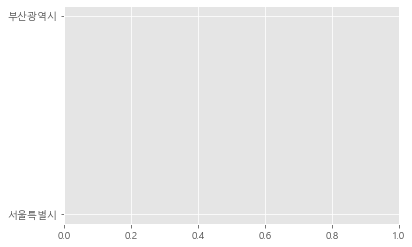

In [162]:
plt.barh(covid_increse_rate.columns, covid_increse_rate.index)
plt.show()

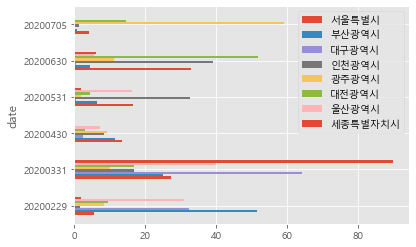

In [277]:
covid_increse_rate.plot(kind = 'barh', x='date')

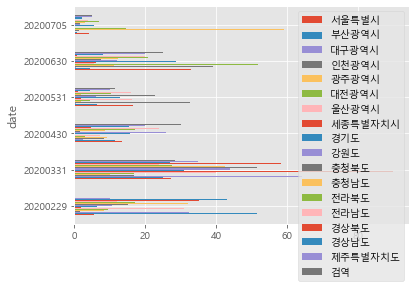

In [358]:
covid_increse_rate.plot(kind = 'barh', x='date')